<a href="https://colab.research.google.com/github/gab-es21/sea-turtles-detection/blob/main/yolov8/01_yolo_v8_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sea Turtle Detection - Yolov8 Tune


## Imports and GPU Check

Check access to GPU.

In [1]:
!pip install nvidia-cuda-runtime-cu12
!pip install cuda-python

!pip install torch==2.1.0+cu121 torchvision==0.16.0+cu121 -f https://download.pytorch.org/whl/torch_stable.html

!pip install roboflow
!pip install -U ultralytics

!pip install python-dotenv
!pip install pickleshare

!nvidia-smi


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Looking in links: https://download.pytorch.org/whl/torch_stable.html



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/40.2 kB ? eta -:--:--
     ------------------- ------------------ 20.5/40.2 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 40.2/40.2 kB 384.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/709.4 kB ? eta -:--:--
   --------- ------------------------------ 163.8/709.4 kB 5.0 MB/s eta 0:00:01
   ----------------------------------- ---- 624.6/709.4 kB 7.9 MB/s eta 0:00:01
   ---------------------------------------  706.6/709.4 kB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 709.4/709.4 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.6
    Uninstalling ultralytics-8.1.6:
      Successfully uninstalled ultralytics-8.1.6



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Thu Feb  1 00:55:48 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.84                 Driver Version: 545.84       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3070      WDDM  | 00000000:2B:00.0  On |                  N/A |
|  0%   50C    P8              25W / 240W |   1081MiB /  8192MiB |      8%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
import dotenv

In [3]:
HOME = os.getcwd()
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


## Get Environment Variables from drive


Load the .env file

In [4]:
dotenv.load_dotenv('../yolov8_local/yolov8.env')

True

In [5]:
ROBOFLOW_API_KEY = os.environ.get('ROBOFLOW_API_KEY')

ROBOFLOW_WORKSPACE = os.environ.get('ROBOFLOW_WORKSPACE')
ROBOFLOW_PROJECT = os.environ.get('ROBOFLOW_PROJECT')

ROBOFLOW_MODEL = os.environ.get('ROBOFLOW_MODEL')
ROBOFLOW_VERSION = os.environ.get('ROBOFLOW_VERSION')

## Install YOLOv8

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [6]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image

Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 634.0/1862.2 GB disk)


## Model

In [14]:
from roboflow import Roboflow
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace(ROBOFLOW_WORKSPACE).project(ROBOFLOW_PROJECT)
dataset = project.version(ROBOFLOW_VERSION).download(ROBOFLOW_MODEL)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.8, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to sea-turtles-1 in yolov8:: 100%|██████████| 2728/2728 [00:00<00:00, 3234.60it/s]


Go to sea-turtles-1/data.yaml, and update the last 2 lines to:

```yaml
train: ../train/images
val: ../valid/images
```


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
                         tune
```

In [8]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.version.cuda)


True
1
12.1


## Custom Training

The purpose of this code block is to train the YOLO v8 object detection model using the specified dataset.


The model will be trained for N epochs, with images resized to 800x800 pixels during training.


The loss curves will be plotted for visualization during the training process.

In [15]:
#model = YOLO(f'{HOME}/models/yolov8n.pt')
model = YOLO(f'{HOME}/models/yolov8s.pt')

In [19]:
!yolo checks



Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 665.4/1862.2 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.11.7
Install             git
RAM                 31.93 GB
CPU                 AMD Ryzen 5 5600X 6-Core Processor
CUDA                12.1

matplotlib          ✅ 3.8.1>=3.3.0
numpy               ✅ 1.26.1>=1.22.2
opencv-python       ✅ 4.8.1.78>=4.6.0
pillow              ✅ 10.1.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.6
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.2>=1.1.4
seaborn             ✅ 0.13.0>=0.11.0


In [20]:
!yolo cfg={HOME}/cfg/cfg_small_tune.yaml

Overriding C:\Users\gaby3\Documents\sea-turtles-detection\.venv\Lib\site-packages\ultralytics\cfg\default.yaml with c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local/cfg/cfg_small_tune.yaml
Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\models\yolov8s.pt, data=C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\data.yaml, epochs=400, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train12, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, 


train: Scanning C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\train\labels.cache... 968 images, 177 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<?, ?it/s]
train: Scanning C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\train\labels.cache... 968 images, 177 backgrounds, 0 corrupt: 100%|██████████| 968/968 [00:00<?, ?it/s]

val: Scanning C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\valid\labels.cache... 272 images, 42 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]
val: Scanning C:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1\valid\labels.cache... 272 images, 42 backgrounds, 0 corrupt: 100%|██████████| 272/272 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]
      1/400      6.11G      3.251      23.53      1.608         43        800:   0%|          | 0/61 [00:45<?, ?it/s]
      1/400      6.11G      3.251      23.53      1.608         43    

In [21]:
print(dataset.location)
print(HOME)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\sea-turtles-1
c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


In [22]:
!yolo checks



Ultralytics YOLOv8.1.8 🚀 Python-3.11.7 torch-2.1.0+cu121 CUDA:0 (NVIDIA GeForce RTX 3070, 8192MiB)
Setup complete ✅ (12 CPUs, 31.9 GB RAM, 670.2/1862.2 GB disk)

OS                  Windows-10-10.0.22631-SP0
Environment         Windows
Python              3.11.7
Install             git
RAM                 31.93 GB
CPU                 AMD Ryzen 5 5600X 6-Core Processor
CUDA                12.1

matplotlib          ✅ 3.8.1>=3.3.0
numpy               ✅ 1.26.1>=1.22.2
opencv-python       ✅ 4.8.1.78>=4.6.0
pillow              ✅ 10.1.0>=7.1.2
pyyaml              ✅ 6.0.1>=5.3.1
requests            ✅ 2.31.0>=2.23.0
scipy               ✅ 1.11.3>=1.4.1
torch               ✅ 2.1.0+cu121>=1.8.0
torchvision         ✅ 0.16.0+cu121>=0.9.0
tqdm                ✅ 4.66.1>=4.64.0
psutil              ✅ 5.9.6
py-cpuinfo          ✅ 9.0.0
thop                ✅ 0.1.1-2209072238>=0.1.1
pandas              ✅ 2.1.2>=1.1.4
seaborn             ✅ 0.13.0>=0.11.0


In [13]:
print(f'{HOME}\cfg\cfg_small_tune.yaml')

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local\cfg\cfg_small_tune.yaml


In [16]:
# Tune hyperparameters on COCO8 for 30 epochs
model.tune(cfg=f'{HOME}\cfg\cfg_small_tune.yaml', iterations=50)

Tuner: Initialized Tuner instance with 'tune_dir=c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/50 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


WARNING ❌️ training failure for hyperparameter tuning iteration 1
Command '['yolo', 'train', 'task=detect', 'mode=train', 'model=c:\\Users\\gaby3\\Documents\\sea-turtles-detection\\yolov8_local/models/yolov8s.pt', 'data=coco.yaml', 'epochs=100', 'time=None', 'patience=50', 'batch=16', 'imgsz=640', 'save=True', 'save_period=-1', 'cache=False', 'device=None', 'workers=8', 'project=None', 'name=None', 'exist_ok=False', 'pretrained=True', 'optimizer=auto', 'verbose=True', 'seed=0', 'deterministic=True', 'single_cls=False', 'rect=False', 'cos_lr=False', 'close_mosaic=10', 'resume=False', 'amp=True', 'fraction=1.0', 'profile=False', 'freeze=None', 'multi_scale=False', 'overlap_mask=True', 'mask_ratio=4', 'dropout=0.0', 'val=True', 'split=val', 'save_json=False', 'save_hybrid=False', 'conf=None', 'iou=0.7', 'max_det=300', 'half=False', 'dnn=False', 'plots=True', 'source=None', 'vid_stride=1', 'stream_buffer=False', 'visualize=False', 'augment=False', 'agnostic_nms=False', 'classes=None', 'ret

In [11]:
# Tune hyperparameters on COCO8 for 30 epochs
#model.tune(data=f'{dataset.location}/data.yaml', epochs=30, iterations=200, optimizer='AdamW', plots=True, save=True, val=True)

Tuner: Initialized Tuner instance with 'tune_dir=c:\Users\gaby3\Documents\sea-turtles-detection\runs\detect\tune4'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/300 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


In [12]:
#!yolo copy-cfg

- [Data Augmentation](https://github.com/ultralytics/ultralytics/blob/fdcf0dd4fda06c4c67bde061fe98f9ddd77b2ea4/ultralytics/utils/tuner.py#L83)
- [Configuration file Doc](https://docs.ultralytics.com/usage/cli/#overriding-default-arguments)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


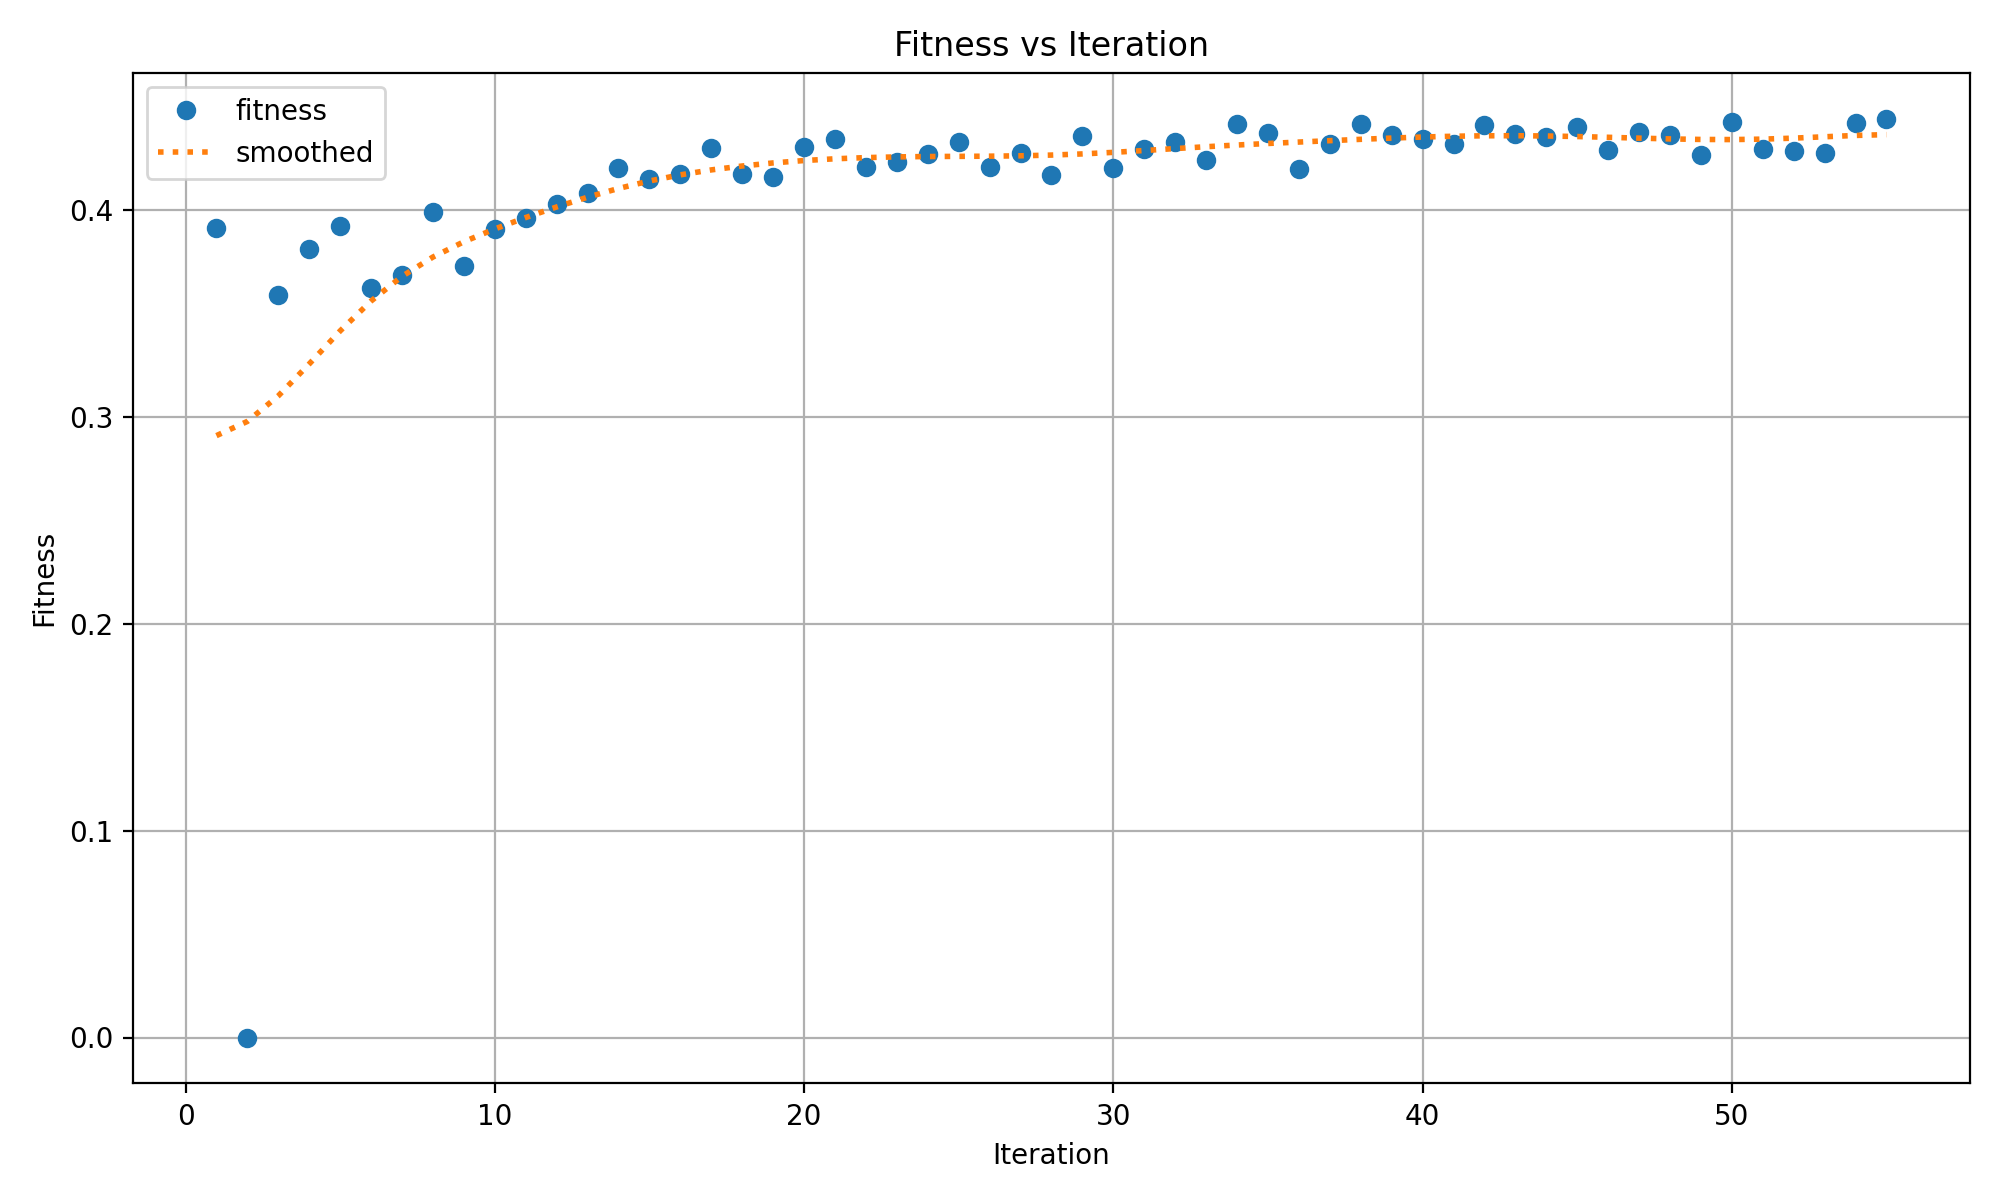

In [9]:
%cd {HOME}
Image(filename=f'./runs/detect/tune3/tune_fitness.png', width=600)

c:\Users\gaby3\Documents\sea-turtles-detection\yolov8_local


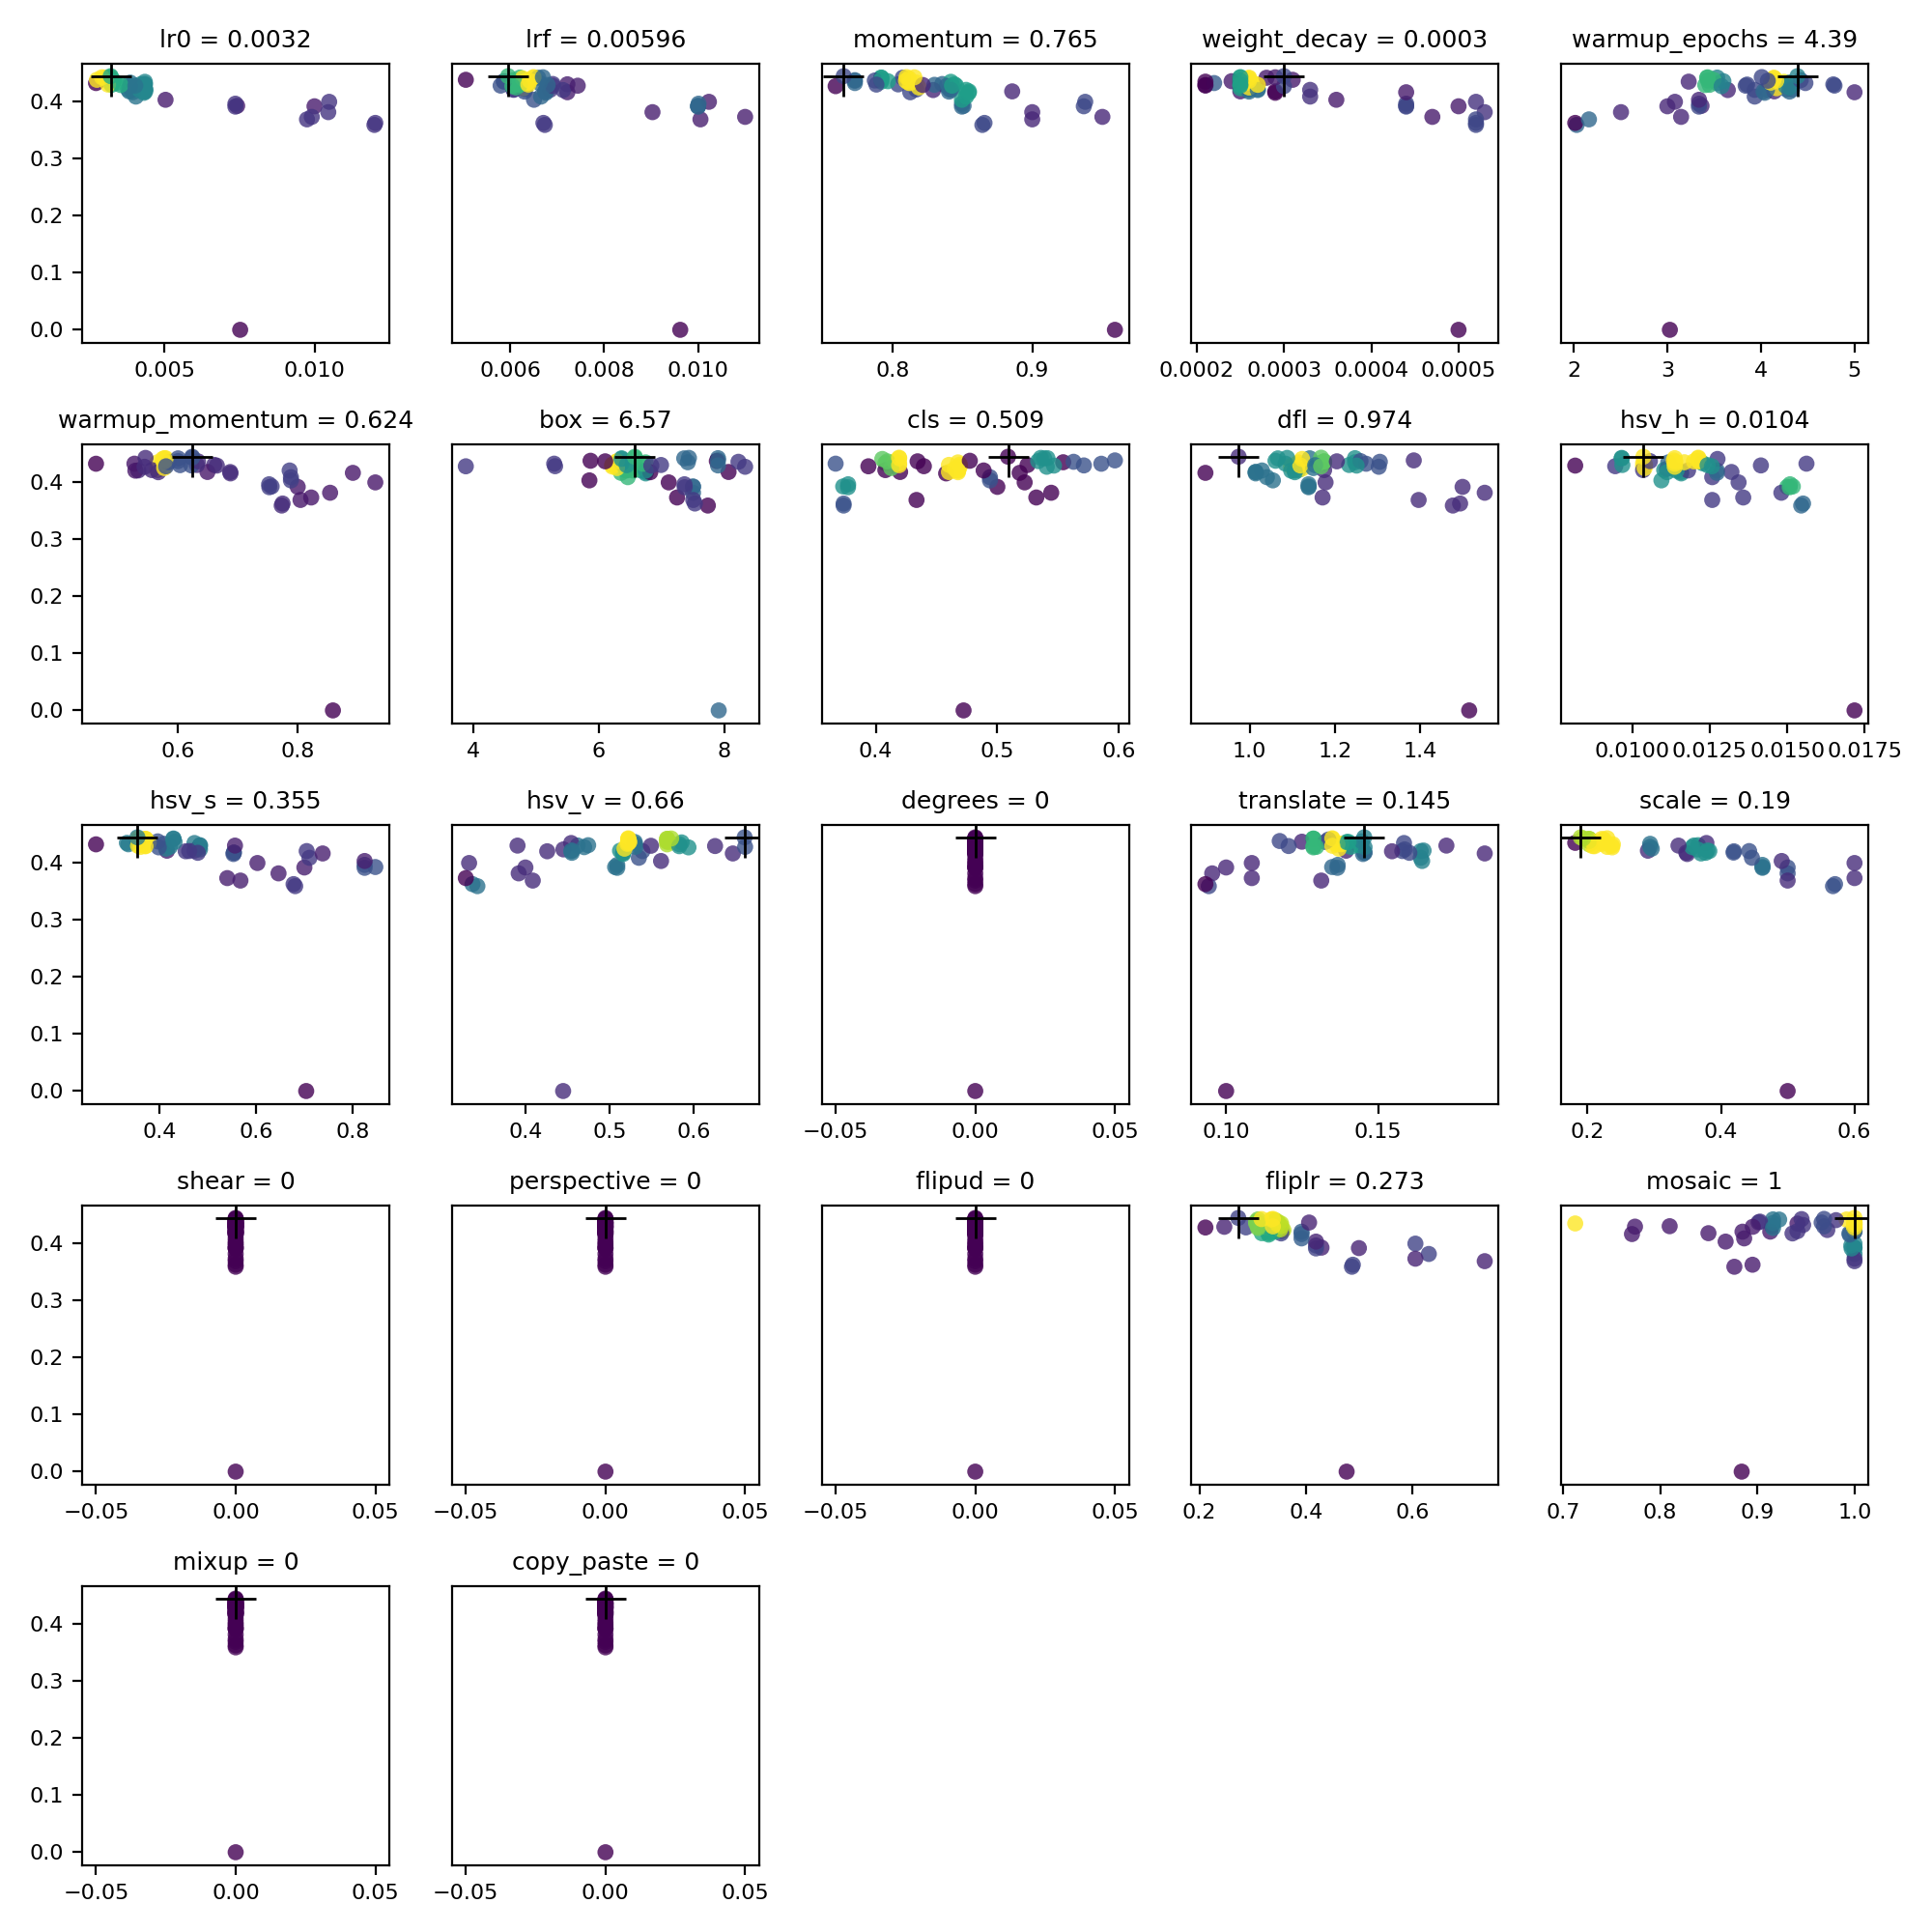

In [10]:
%cd {HOME}
Image(filename=f'./runs/detect/tune3/tune_scatter_plots.png', width=600)